## Linear Regression with One Variable

It means fitting a straight line to your data.Any supervised learning model that predicts a number such as 220,000 or 1.5 or negative 33.2 is addressing what's called a regression problem.There are other models for addressing regression problems too. In regression there are infinitely many possible outputs.

### Notation in ML

The dataset that you just saw and that is used to train the model is called a training set. 

x= "input variable" or "feature" or "input feature"

y= "output variable" or "target variable"

m=total number of training examples

(x,y) = to denote single training example

I'm going to use the notation x superscript in parenthesis, i, y superscript in parentheses i. The superscript tells us that this is the ith training example, such as the first, second, or third up to the 47th training example. I here, refers to a specific row in the table.

### How does this work ?

To train the model, you feed the training set, both the input features and the output targets to your learning algorithm. Then your supervised learning algorithm will produce some function. We'll write this function as lowercase f, where f stands for function.The job with f is to take a new input x and output and estimate or a prediction, which I'm going to call y-hat. The function f is called the model. y-hat is estimation of y. y is actual target value in training set.

#### How to represent f and what is linear regression

For now lets stick with f being a straight line.

f(x) = wx+b

Algorithm learns from this data and generates the best-fit line. This straight line is above function. Using this right now since its easy. Eventually we will use complex functions as well that include the curves parabolas etc. The model where we use straight line is linear regression with one variable or Univariate linear regression.

### Model Representation

In [9]:
#Some notations u might use
#the ones we  studied in the lecture
#w is weights
#b is the bias 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#apply the following style to every plot
plt.style.use("C:/Users/prish/Python/Machine_Learning/deeplearning.mplstyle")
#u must have above style in root folder

This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for 300,000 dollars and a house with 2000 square feet sold for 500,000  dollars. These two points will constitute our data or training set.

In [12]:
#x_train is input variable (size in 1000 sq feet)
#y_train is target (price in 1000s of  dollars)
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])
# f is is used to embed variables directly inside strings.
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


### Number of training examples m

You will use m to denote the number of training exmaples. Numpy arrays have a .shape parameter. x_train.shape returns a python tuple with an entry for each dimension. x_train.shape[0] is the length array and number of examples as shown below.

In [14]:
print(f"x_train.shape: {x_train.shape}")
#(2,) means only 2 elements in x_train and it is 1D  project
m=x_train.shape[0]
print(f"Number of training examples is : {m}")
#u can also use len(x_train)

x_train.shape: (2,)
Number of training examples is : 2


### Training example x_i , y_i

Lets index the values i.e our training data set to 0 and 1 g example.

In [16]:
i=0

x_i = x_train[i]
y_i = y_train[i]

print(f"(x^({i}),y^({i})) = ({x_i},{y_i})")

(x^(0),y^(0)) = (1.0,300.0)


### Plotting the data

Text(0.5, 0, 'Size in 1000  sq feet')

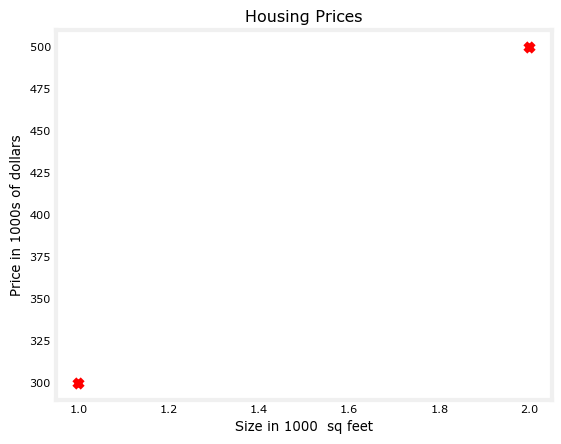

In [18]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Housing Prices")
plt.ylabel('Price in 1000s of dollars')
plt.xlabel('Size in 1000  sq feet')

### Model Function

Now we know the formula f(x) = wx + b
Different values of w and b give u diff straight lines on the plot.Lets try w=100 and b=100

In [20]:
#u can come back to this cell to adjust the b and w parameters
w=200
b=100
print(f"w:{w}")
print(f"b:{b}")

w:200
b:100


Now we will calculate the function for each point.Here number of points are less so we can do it explicitely as writing the fucntion for first point and then second point. For large number of points we can use the for loop as shown in function below.

In [22]:
def compute_model_output(x,w,b):
    """
    Computes the prediction of a linear model 
    Args:
    x (ndarray(m,)) : Data, m examples ... here ndarray describes the numpy n dimensional array of shape (m,)
    w,b(scalar) : model parameters... where scalar means argument without dimension and only magnitude
    Returns 
    y (ndarray(m,)) : target values
    """
    m=x.shape[0]
    f_wb = np.zeros(m) #creates a numpy array of length m
    for i in range(m):
        f_wb[i] = w* x[i] + b

    return f_wb

### Using the above function and computing the target values

In [24]:
tmp_f_wb = compute_model_output(x_train,w,b)

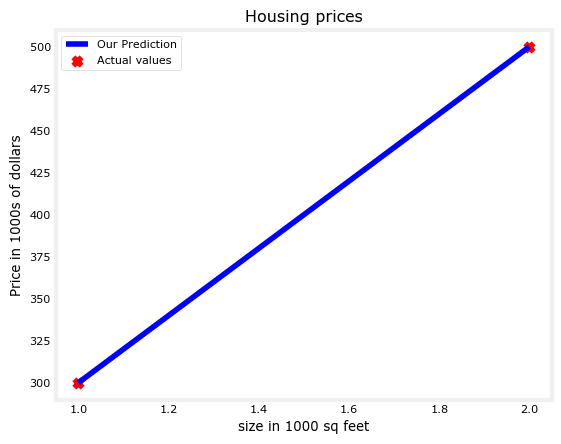

In [25]:
#plotting our prediction
plt.plot(x_train,tmp_f_wb,c='b',label="Our Prediction")
#plot the data points
plt.scatter(x_train,y_train,marker='x',c='r',label="Actual values")
plt.title("Housing prices")
plt.ylabel('Price in 1000s of dollars')
plt.xlabel('size in 1000 sq feet')
plt.legend()

We can see that w=100 and b=100 does not result in a line that fits our data so we try diff values of them to fit the line

### Prediction 
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of x  are in 1000's of sqft,
  s 1.2.

In [28]:
w=200
b=100
x_i=1.2
cost_1200sqft = w * x_i + b

print (f"${cost_1200sqft:.0f} thousand dollars")
# :.0f formats the number to 0 decimal places

$340 thousand dollars


## Cost Function

The cost function will tell us how well the model is doing so that we can try to get it to do better.

#### What do these parameters / weights / coeffients w and b do ?

w is slope and b is the intercept.Diff w and b generate diff f functions.For example w=0 and b=1.5 then its horizontal line passing through y axis.

See that the line fits the data visually, you can think of this to mean that the line defined by f is roughly passing through or somewhere close to the training examples as compared to other possible lines that are not as close to these points.

#### How to measure how well does the lines fit the training data

We will construct the cost function now. The cost function is basically sq mean error of all the examples in the training set. 

J = (1/2m)*(summition ( y hat [i] - y [i] )^2)

There are more cost function as well but this is so far most comman one. We find the values of b and w such that the cost function becomes small.

#### For now lets focus on simplified function

f(x) = wx where we can say we put b = 0 . Formula of J remains same. Here we have to find value of w such that we minimize J. f(x) always passes through origin since b = 0.

In the video "Cost function intuition" , we have taken diff values of w to plot J(w). And made the line in the plot for f(x). The J(w) vs w plot came out to be a parabola i.e u shaped upwards.

You find the values of w and b that minimize J.

#### Now lets try and visualise the cost function with both b and w

Here when we plot the J(w) vs w plot then also it is similar as in above except for the part that it is in 3D. It looks  like a curved dinner plate or hammock. Here we would like to plot the contour plot instead of regular 3D plot. It looks like mount fauji from top. It shows all the points, they're at the same height for different heights. To get the contour plots, you take the 3D surface at the bottom and you use a knife to slice it horizontally. You take horizontal slices of that 3D surface and get all the points, they're at the same height.Therefore, each horizontal slice ends up being shown as one of these ellipses or one of these ovals.You see also that these three points correspond to different functions, f. Basically there is a bowl in the 3D plot i.e U shaped....Imagine that coming out of the desk and then the points on the same height make a countour line i.e they all have same J. In the center of countour map, the J is minimum. It turns out that the contour plots are a convenient way to visualize the 3D cost function J, but in a way, there's plotted in just 2D.

When the J we have in far away from minimum J in the contour plot. The distance between center and the J we have shows how far we are from minimum.

Minimum is the center of smallest ellipse in the countour plot.

## Implementing the Cost Function

In [36]:
#now before using the matplotlib widget we have to install the ipympl package
!pip install ipympl

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
#this helps you to interact with the plots like zoom,pan,hover
%matplotlib inline

#we are importing the helper functions from lab_utils_uni
#plt_intuition Visualize how a linear regression line fits the training data.
#plt_stationary Visualizes the cost surface when the model is near or at convergence.
#plt_update_onclick is an An interactive tool.
#soup_bowl Creates a 3D cost surface — often looks like a "soup bowl".
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl

#now we will set a custom matplotlib style
plt.style.use("C:/Users/prish/Python/Machine_Learning/deeplearning.mplstyle")

In [38]:
#we are taking the same problem as we did in the model representation
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

In [39]:
#in code range in J is from 0 to n-1
def compute_cost(x,y,w,b):
    #returns the total_cost : the cost of using w and b as parameters for linear regression model to fit the data points in x and y
    m=x.shape[0]
    cost_sum=0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum =  cost_sum + cost
    total_cost = (1/(2*m))*cost_sum
    return total_cost

In [40]:
#now from previous lab put b=100 and now lets focus on w. Below we can use a slider to select value of
# w that minimizes the cost

#in order to use the widgets i.e the slider we have to install it first and we must install widgets for upgraded version of python
!pip install ipywidgets>=8

plt_intuition(x_train,y_train)
#there is some error in showing the widget
#points to see are

#cost is minimized when w=200 which matches results from previous lab
#because diff between target and prediction is squared then cost increases rapidly when w is either too large or too small i.e parabola banta hai
#using w and b selected by minimizing cost results in a line which is a perfect fit to the data.

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

### Cost function visualization in 3D

You can see how cost varies with respect to both w and b by plotting in 3D or uisng a contour plot. We will now work with few more data points. This set includes data points that will not fall on same line.

In [42]:
x_train = np.array([1.0,1.7,2.0,2.5,3.0,3.2])
y_train = np.array([250,300,480,430,630,730])

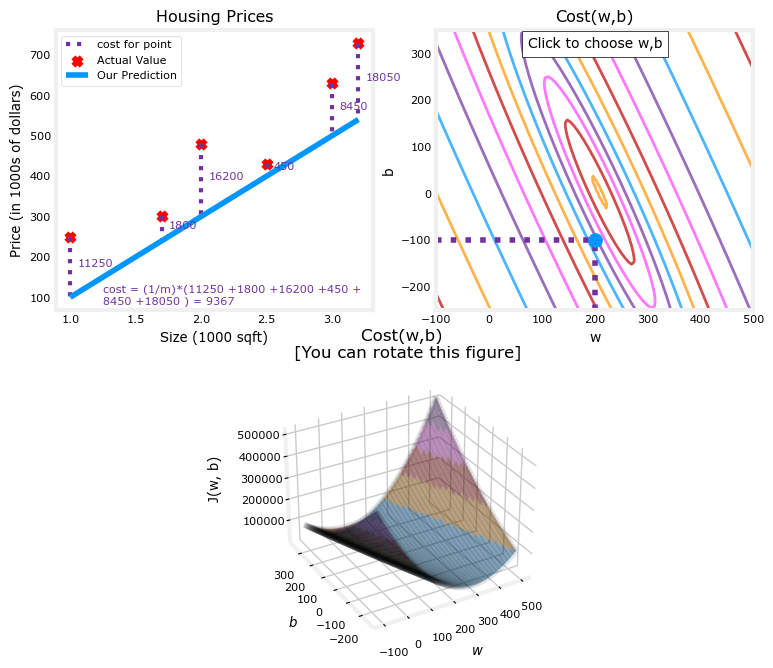

In [43]:
#now we make plots to achieve lowest cost of w and b
plt.close('all')
#the above line closes all the plots that are currently opened graphs.
fig,ax,dyn_items = plt_stationary(x_train,y_train)
#plt_stationary plots training data and initializes the line
#this function returns the figure ax:axes  and dyn_items i.e dynamic plot elements like prediction line,cost text etc.
updater = plt_update_onclick(fig,ax,x_train,y_train,dyn_items)
#this function attaches an event handler on the fig  and this handler listens for mouse clicks on the plot(ax)
#on clicking it updates the w and b and calculcates new prediction line

Pls note that since our all training exmaples are not on line, the minimum cost is not zero here. Also the values w=209 and b=2.4 provide the lowest cost possible.


### Convex Cost Surface

The fact that cost function squares the loss ensures that 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because w and b dimensions scale differently, this is not easy to recognize.

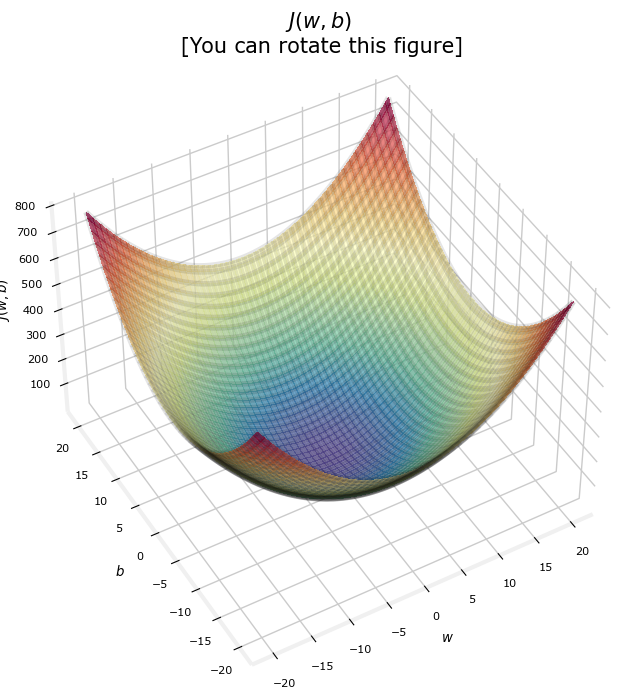

In [46]:
soup_bowl()

## Gradient Descent

Now in linear regression, rather than having to manually try to read a contour plot for the best value for w and b, which isn't really a good procedure and also won't work once we get to more complex machine learning models.What you really want is an efficient algorithm that you can write in code for automatically finding the values of parameters w and b they give you the best fit line. That minimizes the cost function j. There is an algorithm for doing this called gradient descent.



Gradient descent is an algorithm that you can use to try to minimize any function, not just a cost function for linear regression.It can have more than 2 parameters and gradient decent will pick values of all paramters such that the function has lowest value possible.

1. Start with some w and b . Lets it be w = 0 and b = 0 (It doesnt matter what initial values are)

2. Keep changing w,b to reduce J(w,b)

3. Untill we settle at or near a minimum

`One thing I should note is that for some functions j that may not be a bow shape or a hammock shape, it is possible for there to be more than one possible minimum`

In this algo if u are standing at the hill then we look around in 360 degree and in which direction should i take my first small step such that i should reach the lowest point in valley(deep in the graph) in comparission to other points. This is direction of  steepest descent. 

`Steep means very quickly rise or fall`

Now at the new point we have to repeat the steps. In what direction shall i take the next baby step. Continue till u find the the local minimum. This what we did , multiple steps of gradient decent.

Now if we start with diff first steps then we might end up in a diff valley and that is diff local minima. Once we reach any one local minima then we wont be able to reach some other local minima from that particular minima.

### Implementing the Gradient Descent

`w = w - aplha*(dJ(w,b)/dw)`

alpha: learning rate (small positive number between 0 to 1)
It controls how big of a step u take downhill
If alpha is large then we are taking aggressively large steps down hill

The derivative tells the direction in which u want to take the small step



`b = b - alpha*(dJ(w,b)/db)`

b also changes as we go downhill.

For gradient descent algorithm, you are going to repeat there teo steps untill the algorithm coverges. By converges, I mean that you reach the point at a local minimum where the parameters w and b no longer change much with each additional step that you take. 

                           `SIMULTANEOUSLY UPDATE W AND B`
First find the derivative the values jo w and b mein se minus krni hai and then simultaneously update w and b by subtracting them from old b and w.

Correct way to do this is first write value of new w into some other variable and same for b and then write 

w = tmp_w
b = tmp_b

basically jab we are calculating the b then osmein jo j hai osmein jo w hai i.e old  w only and not the new w.

### Gradient descent intuition

Suppose we have only w parameter. Then we get parabola curve in 2D J(w) vs w. Suppose take any initial point of w and it would correspond to some point on the curve. Make a tangent on that curve. The slope of this line is derivative of J w.r.t w. 

Here we took the initial point on right of the parabola. The line is pointing in upward direction means its positive and learning rate i.e alpha is always positive and hence we subtract a positive number from old w. Hence we are decreasing value of w and moving towards left. That it is going according to our goal where the J(w) cost is decreasing. 

Simillarly if we take a point on left of parabola then also the gradient descent seems to be doing the right work.

### Learning Rate

The choice of the learning rate, alpha will have a huge impact on the efficiency of your implementation of gradient descent. 

If the learning rate is too small, then gradient descents will work, but it will be slow. It will take a very long time because it's going to take these tiny tiny baby steps. And it's going to need a lot of steps before it gets anywhere close to the minimum. 

If the learning rate is too large, then gradient descent may overshoot and may never reach the minimum. And another way to say that is that great intersect may fail to converge and may even diverge.

If you're already at a local minimum, gradient descent leaves W unchanged since the slope at minimum is 0. Since the derivative is zero and hence nothing is subtracted from w.

Depending on the curve , as we move down the curve, the slope gets less steeper and hence derivative becomes smaller whereas alpha remains same. Then derivative goes smaller and smaller and hence our steps towards minimum J(w) become smaller and then we reach the local  minima.

### Gradient Decsent for Linear Regression

Now we are combing everything we learnt so far. To train the linear regression model to fit a straight line to achieve the training data. We have formulas for linear regression , cost function and gradient descent algorithm. The cost function has 1/2m instead of only m while finding the avg, since while finding the derivative the 2 is cancelled out and our partial derivative becomes neater. 

Now we know there might be multiple local minima and problem with gradient descent is that we are not able to find the global minima. Whereas when we use squared error cost then the shape is bowl shape and it has just one minima i.e global minima. The cost function is convex function. A convex function is a type of mathematical function where the line segment between any two points on its graph lies above or on the graph.It always has bowl shape and only one minima. 

When you implement gradient descent on a convex function, one nice property is that so long as you're learning rate is chosen appropriately, it will always converge to the global minimum. 

### Running Gradient Descent 

The term BATCH GRADIENT DESCENT refers to the fact that on every step of gradient descent, we're looking at all of the training examples, instead of just a subset of the training data. It every step does summition of data and hence looks at all of the data at every step.

## Implementing Gradient Descent

In [60]:
#We will automate the process of optimizing w and b using gradient descent
import math,copy
#mathematical functions like math.pi , math.exp() can be used 
#copy helps u make deep or shallow copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("C:/Users/prish/Python/Machine_Learning/deeplearning.mplstyle")
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [61]:
#we are continuing the same problem statement as earliar
x_train = np.array([1.0,2.0])
y_train  = np.array([300.0,500.0])

In [62]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0

    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2*m)*cost

    return total_cost

We will be using 3 functions here 

1. compute_cost as above
2. compute_gradient to calculate derivatives 
3. gradient_descent jismein upar wale dono functions honge

dj_db means derivative of j w.r.t to b

In [64]:
def compute_gradient(x,y,w,b):
    '''
    Computes the gradient for linear regression
    Args:
        x (ndarray(m,)) : data , m exmaples
        y (ndarray(m,)) : target values
        w,b (scalar) : model parameters
    Returns 
        dj_dw (scalar)
        dj_db (scalar)
    '''

    m=x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw,dj_db

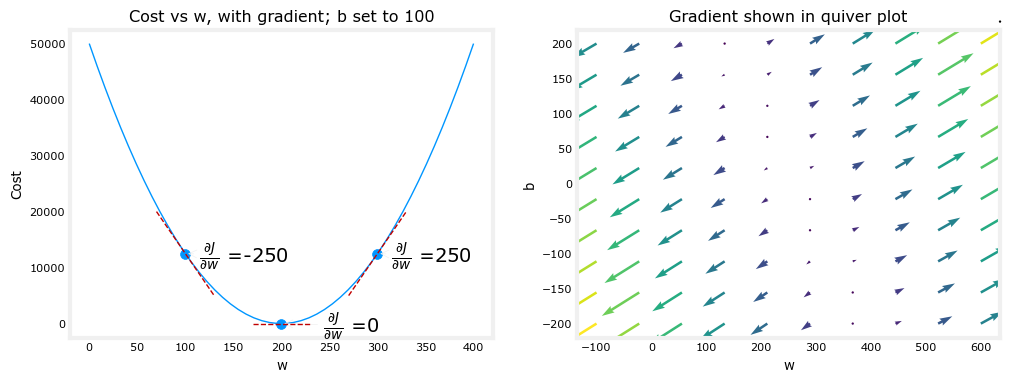

In [90]:
plt_gradients(x_train,y_train,compute_cost,compute_gradient)
plt.show()
#left plot has b fixed whereas quiver plot on right provides a means of viewing the gradient of both parameters.
#The arrow sizes reflect the magnitude of the gradient at that point.
#The direction and slope of arrow reflects the ratio of derivative of J w.r.t to w and w.r.t to b at that point.
#The gradient points away from the minimum.
#The goal of gradient descent is to move against the arrows to reach the point where the gradient is smallest—i.e., the minimum of the cost function.

In [95]:
#we will use this function to find the optimal values of w and b on training data
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    '''
    Performs the gradient descent to fit w,b . Updates w,b by taking num_iters gradient steps with learning rate alpha
    Args:
        num_iters(int): number of iterations to run gradient descent
        cost_function: function to call to produce cost
        gradient_function: function to call to produce gradient

     Returns:
         w(scalar):Updated value of parameter after running gradient descent
         b(scalar):Updated value of parameter after running gradient descent
         J_history (list):History of cost values
         p_history (list):History of parameters [w,b]
      '''

    #w=copy.deepcopy(w_in) #avoid modifying global w_in
    J_history = []
    p_history = []
    #since numbers are immutable so deep copy isnt needed for them
    #on modifying b that wont modify b_in
    b = b_in
    w = w_in
    #only if w or b is numpy array or list then deep copy is required

    for i in range(num_iters):
        #calculate the gradient descent and update the paramters using gradient_function
        dj_dw,dj_db = gradient_function(x,y,w,b)

        #update the parameters 
        b =  b - alpha*dj_db
        w = w - alpha*dj_dw

        #save cost J at each iteration
        if i<10000: #prevent resourse exhaustion
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        #print cost every at intervals 10  times or as many interations if <10
        if i%math.ceil(num_iters/10) == 0:
            #ceil takes upar wala
            print(f"Iteration {i:4}:Cost {J_history[-1]:0.2e}",
                  f"dj_dw: {dj_dw:0.3e},dj_db: {dj_db: 0.3e} ",
                  f"w: {w:0.3e},b:{b:0.5e}")
            #i is printed in 4 character wild field means it will occupy atleast 4 spaces
            #last cost with scientific notation with 2 decimal places
    return w, b, J_history, p_history   
    

In [130]:
#lets initialize the parameters
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
#run gradient descent
w_final,b_final,J_hist,p_hist=gradient_descent(x_train,y_train,w_init, b_init,tmp_alpha,iterations,compute_cost,compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")
#8 is total width of output field and 4 means 4 places after decimal
#f means float

Iteration    0:Cost 7.93e+04 dj_dw: -6.500e+02,dj_db: -4.000e+02  w: 6.500e+00,b:4.00000e+00
Iteration 1000:Cost 3.41e+00 dj_dw: -3.712e-01,dj_db:  6.007e-01  w: 1.949e+02,b:1.08228e+02
Iteration 2000:Cost 7.93e-01 dj_dw: -1.789e-01,dj_db:  2.895e-01  w: 1.975e+02,b:1.03966e+02
Iteration 3000:Cost 1.84e-01 dj_dw: -8.625e-02,dj_db:  1.396e-01  w: 1.988e+02,b:1.01912e+02
Iteration 4000:Cost 4.28e-02 dj_dw: -4.158e-02,dj_db:  6.727e-02  w: 1.994e+02,b:1.00922e+02
Iteration 5000:Cost 9.95e-03 dj_dw: -2.004e-02,dj_db:  3.243e-02  w: 1.997e+02,b:1.00444e+02
Iteration 6000:Cost 2.31e-03 dj_dw: -9.660e-03,dj_db:  1.563e-02  w: 1.999e+02,b:1.00214e+02
Iteration 7000:Cost 5.37e-04 dj_dw: -4.657e-03,dj_db:  7.535e-03  w: 1.999e+02,b:1.00103e+02
Iteration 8000:Cost 1.25e-04 dj_dw: -2.245e-03,dj_db:  3.632e-03  w: 2.000e+02,b:1.00050e+02
Iteration 9000:Cost 2.90e-05 dj_dw: -1.082e-03,dj_db:  1.751e-03  w: 2.000e+02,b:1.00024e+02
(w,b) found by gradient descent: (199.9929,100.0116)


### Cost versus iteration of gradient descent

A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial descent on diff scale than the final descent. In the plots below, note the scale of cost on axes and the iteration step.

Text(0.5, 0, 'Iteration step')

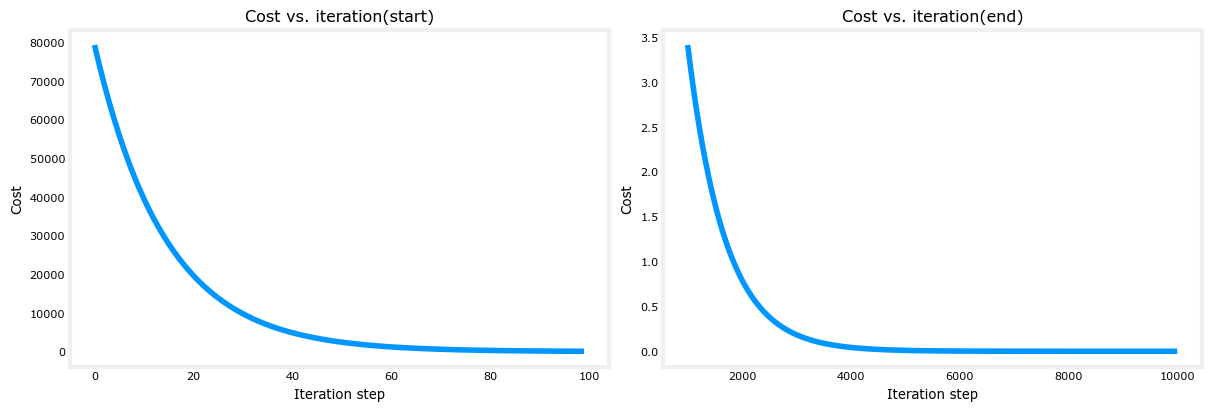

In [142]:
#plot cost versus iteration
fig, (ax1,ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
#fig is like canvas ...the entire fig object
#we have 2 subplots ax1 and ax2
#constrained_layout means adjusts space such that labels of 2 graphs dont overlap
#u can either write like this or individually activate the subplots and plot them
ax1.plot(J_hist[:100]) #plots first 100 iterations
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
#x axis creates step from 1000 to uptill data
#set_title is used when in subplots without selecting the subplots we are directly giving title to both
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration(end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')
ax2.set_xlabel('Iteration step')

### Predictions

In [145]:
print(f"1000 sqft house prediction {w_final*0.1 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 120.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


### Plotting 

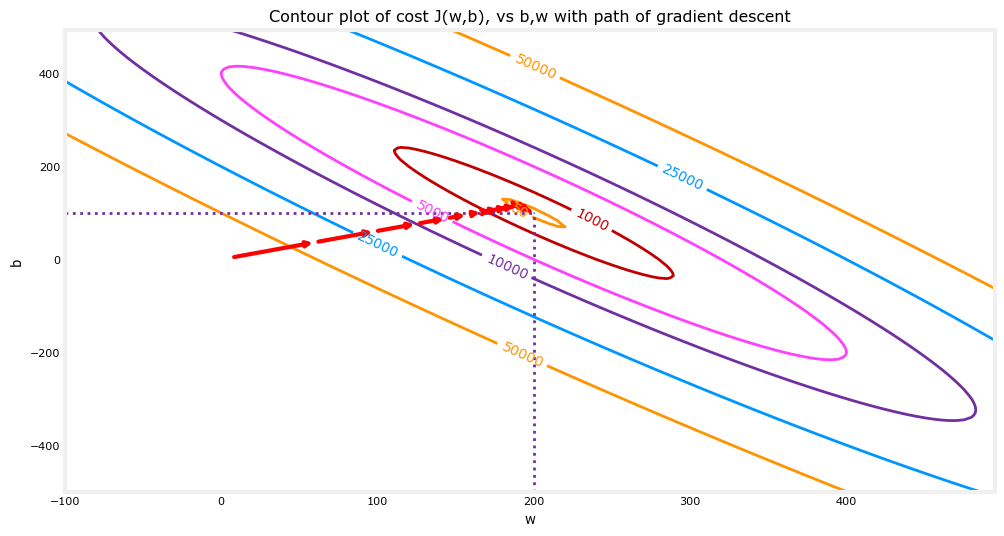

In [152]:
# u can show the progress of gradient descent during its execution by plotting the cost pver iterations on countour plot
fig,ax = plt.subplots(1,1,figsize=(12,6))
#the above is used to plot single graph
plt_contour_wgrad(x_train,y_train,p_hist,ax)
#in the plot u can see initial steps are larger than steps near the goal
#the path makes steady progress towards its goal

### Zooming In

We can see final steps of gradient descent. Note the distance between steps shrinks as gradient approaches zero.

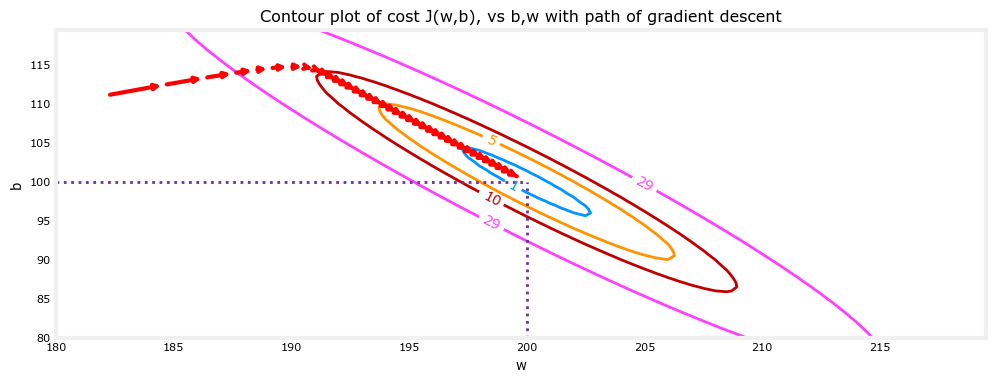

In [163]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train,y_train,p_hist,ax,w_range=[180,220,0.5],b_range=[80,120,0.5],contours=[1,5,10,29],resolution=0.5)
#w_range says to try w values from 180 to 220 in 0.5 step size 
#Contours = [1,5,10,29] draws plot lines at these costs
#resolution sees hows smooth the curves would be
#increasing makes them more smoother whereas decreasing faster but more rough (not detailed)

### Increased Learning Rate

Larger alpha leads to faster gradient descent but too large leads to gradient descent diverging.

In [166]:
w_init = 0
b_init = 0
iterations = 10
tmp_alpha = 8.0e-1
w_final, b_final, J_hist, p_hist = gradient_descent(x_train,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

Iteration    0:Cost 2.58e+05 dj_dw: -6.500e+02,dj_db: -4.000e+02  w: 5.200e+02,b:3.20000e+02
Iteration    1:Cost 7.82e+05 dj_dw: 1.130e+03,dj_db:  7.000e+02  w: -3.840e+02,b:-2.40000e+02
Iteration    2:Cost 2.37e+06 dj_dw: -1.970e+03,dj_db: -1.216e+03  w: 1.192e+03,b:7.32800e+02
Iteration    3:Cost 7.19e+06 dj_dw: 3.429e+03,dj_db:  2.121e+03  w: -1.551e+03,b:-9.63840e+02
Iteration    4:Cost 2.18e+07 dj_dw: -5.974e+03,dj_db: -3.691e+03  w: 3.228e+03,b:1.98886e+03
Iteration    5:Cost 6.62e+07 dj_dw: 1.040e+04,dj_db:  6.431e+03  w: -5.095e+03,b:-3.15579e+03
Iteration    6:Cost 2.01e+08 dj_dw: -1.812e+04,dj_db: -1.120e+04  w: 9.402e+03,b:5.80237e+03
Iteration    7:Cost 6.09e+08 dj_dw: 3.156e+04,dj_db:  1.950e+04  w: -1.584e+04,b:-9.80139e+03
Iteration    8:Cost 1.85e+09 dj_dw: -5.496e+04,dj_db: -3.397e+04  w: 2.813e+04,b:1.73730e+04
Iteration    9:Cost 5.60e+09 dj_dw: 9.572e+04,dj_db:  5.916e+04  w: -4.845e+04,b:-2.99567e+04


Above w and b are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Hence the learning rate is too large and solution is diverging.

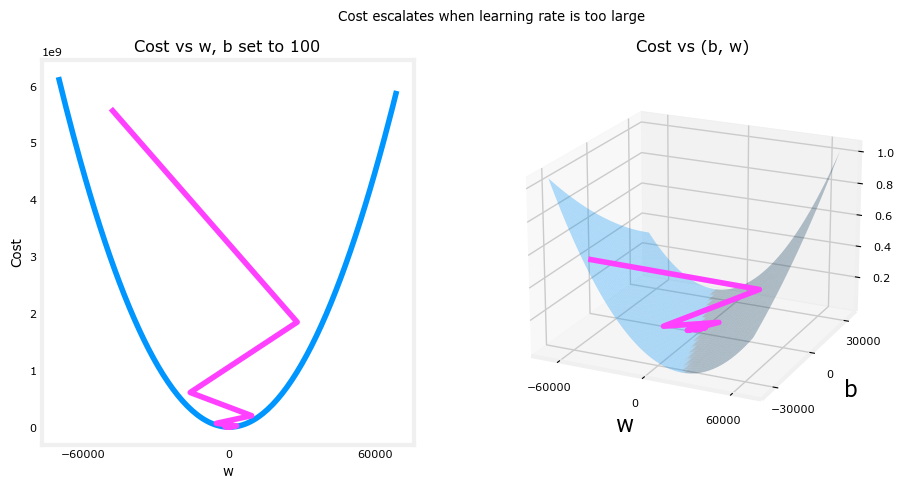

In [171]:
plt_divergence(p_hist,J_hist,x_train,y_train)
#u can see the graph how values of w and b are jumping in the bowl shape
#it goes from one end to another
#the same has been explained in the lecture that it is happening
#the cost is growing rapidly